In [56]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import solve_continuous_lyapunov
import matplotlib.pyplot as plt

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—ä–µ–∫—Ç–∞ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è
a0 = -1
a1 = 1
b0 = 2

# –ú–∞—Ç—Ä–∏—Ü—ã –æ–±—ä–µ–∫—Ç–∞ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è
A = np.array([[0, 1],
              [-a0, -a1]])
b = np.array([[0.0],
              [b0]])

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —ç—Ç–∞–ª–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ (–∂–µ–ª–∞–µ–º–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ)
am0, am1 = 256.0, 32.0
Am = np.array([[0, 1],
               [-am0, -am1]])
bm = np.array([[0.0],
               [am0]])

# –ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ç–æ—Ä–∞
theta_ideal = np.array([[(a0 - am0)/b0],
                        [(a1 - am1)/b0]])

# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —É—Å–∏–ª–µ–Ω–∏—è
kappa = b0 / am0

# –ú–∞—Ç—Ä–∏—Ü—ã –¥–ª—è —É—Ä–∞–≤–Ω–µ–Ω–∏—è –õ—è–ø—É–Ω–æ–≤–∞
Q = np.eye(2)
P = solve_continuous_lyapunov(Am.T, -Q)

print("–ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–∏—Å—Ç–µ–º—ã –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã:")
print(f"–û–±—ä–µ–∫—Ç —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è: a0={a0}, a1={a1}, b0={b0}")
print(f"–≠—Ç–∞–ª–æ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å: am0={am0}, am1={am1}")
print(f"–ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏* = [{theta_ideal[0,0]:.1f}, {theta_ideal[1,0]:.1f}]")

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–∏—Å—Ç–µ–º—ã –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã:
–û–±—ä–µ–∫—Ç —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è: a0=-1, a1=1, b0=2
–≠—Ç–∞–ª–æ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å: am0=256.0, am1=32.0
–ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏* = [-128.5, -15.5]


In [ ]:
'–ü–†–ò–ë–†–ê–¢–¨–°–Ø –í –ù–ê–ó–í–ê–ù–ò–Ø–• –î–£–ë–õ–ò–†–û–í–ê–ù–ù–´–• –§–£–ù–ö–¶–ò–ô!'


def get_g(t):
    return np.sign(np.sin(0.5 * t)) + 2

def control_u(x, theta_hat, g, kappa):
    """–ó–∞–∫–æ–Ω —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è: u = theta_hat^T * x + g/kappa"""
    result = theta_hat.T @ x + g / kappa
    return float(result[0, 0])  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º —Å–∫–∞–ª—è—Ä


def get_u_not_adapt(x, theta, g, kappa):
    # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ theta –∏–º–µ–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—É—é —Ñ–æ—Ä–º—É –¥–ª—è —É–º–Ω–æ–∂–µ–Ω–∏—è
    theta = theta.reshape(-1)  # –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤ —Ñ–æ—Ä–º—ã (2,)
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Å–∫–∞–ª—è—Ä–Ω–æ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–∏ x
    dot_product = np.sum(x * theta, axis=1)
    
    # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ g –∏–º–µ–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—É—é —Ñ–æ—Ä–º—É
    if g.ndim > 1:
        g = g.flatten()
    
    return dot_product + g / kappa

def theta_hat_dot_func(x, xm, P, b):
    """–ó–∞–∫–æ–Ω –∞–¥–∞–ø—Ç–∞—Ü–∏–∏"""
    gamma = 1
    # e = xm - x
    e = x - xm
    # return gamma * x @ (b.T @ P @ e)
    return -gamma * x @ (b.T @ P @ e)


In [57]:
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

def get_y(C, x):
    """–í—ã—Ö–æ–¥–Ω–æ–π —Å–∏–≥–Ω–∞–ª —Å–∏—Å—Ç–µ–º—ã"""
    return C @ x

def get_x_dot(A, x, B, u):
    """–ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Å–æ—Å—Ç–æ—è–Ω–∏—è –æ–±—ä–µ–∫—Ç–∞"""
    return A @ x + B @ u

def get_xm_dot(Am, xm, bm, g):
    """–ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Å–æ—Å—Ç–æ—è–Ω–∏—è —ç—Ç–∞–ª–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏"""
    return Am @ xm + bm @ g

def closed_loop_adaptive(t, state):
    """
    –ê–¥–∞–ø—Ç–∏–≤–Ω–∞—è –∑–∞–º–∫–Ω—É—Ç–∞—è —Å–∏—Å—Ç–µ–º–∞
    state = [x(2), xm(2), theta_hat(2)]
    """
    x = state[0:2].reshape(2, 1)
    xm = state[2:4].reshape(2, 1)
    theta_hat = state[4:6].reshape(2, 1)

    g = get_g(t)
    u = control_u(x, theta_hat, g, kappa)

    x_dot = A @ x + b * u
    xm_dot = Am @ xm + bm * g
    theta_hat_dot = theta_hat_dot_func(x, xm, P, b)

    return np.vstack((x_dot, xm_dot, theta_hat_dot)).flatten()

print("–§—É–Ω–∫—Ü–∏–∏ —Å–∏—Å—Ç–µ–º—ã –∑–∞–≥—Ä—É–∂–µ–Ω—ã")

–§—É–Ω–∫—Ü–∏–∏ —Å–∏—Å—Ç–µ–º—ã –∑–∞–≥—Ä—É–∂–µ–Ω—ã


In [33]:
t_span = (0, 0.5)
t = np.linspace(t_span[0], t_span[1], 1000)
g = get_g(t)

# y0 = np.zeros(6)
# x = state[0:2].reshape(2, 1)
# xm = state[2:4].reshape(2, 1)
# # theta_hat = state[4:6].reshape(2, 1)


# get_xm_dot(Am, x, bm, g)

In [35]:
# –Ω–∞—á–∞–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è: –≤—Å–µ –Ω—É–ª–∏
y0 = np.zeros(6)
sol = solve_ivp(closed_loop, t_span, y0,
                method='RK45', max_step=0.01, dense_output=True)
Y = sol.sol(t).T    # shape: (N,6)

x = Y[:, 0:2]
xm = Y[:, 2:4]        
theta_hat = Y[:, 4:6]

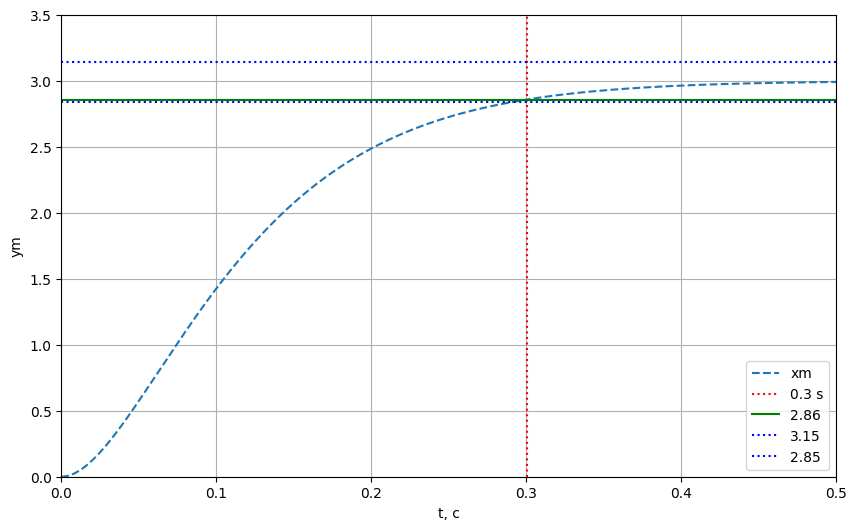

In [36]:
theta

–ù–∞–ø–∏—Å–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –í–°–í –∏ –ø–æ–ª—É—á–µ–Ω–∏—è x –ø–æ u
–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫

# 2. –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ —Å–∏—Å—Ç–µ–º—ã —Å –Ω–µ–∞–¥–∞–ø—Ç–∏–≤–Ω—ã–º —Ä–µ–≥—É–ª—è—Ç–æ—Ä–æ–º

## 2.1 –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å —Ä–∞—Å—á–µ—Ç–Ω—ã–º–∏ (–∏–¥–µ–∞–ª—å–Ω—ã–º–∏) –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [58]:
# –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 2.1: –ò—Å–ø–æ–ª—å–∑—É–µ–º –∏–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ç–æ—Ä–∞
theta_exp1 = np.array([theta_ideal[0, 0], theta_ideal[1, 0]])  # [-128.5, -15.5]

print("=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 2.1: –ò–î–ï–ê–õ–¨–ù–´–ï –ü–ê–†–ê–ú–ï–¢–†–´ ===")
print(f"–ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ç–æ—Ä–∞: Œ∏ = [{theta_exp1[0]:.1f}, {theta_exp1[1]:.1f}]")
print(f"–ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  Œ∏* = [{theta_ideal[0,0]:.1f}, {theta_ideal[1,0]:.1f}]")
print(f"–û—à–∏–±–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: ŒîŒ∏ = [0.0, 0.0] (–∏–¥–µ–∞–ª—å–Ω–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ)")

def simulate_nonadaptive_system(theta_params, experiment_name, t_end=30):
    """–ú–æ–¥–µ–ª–∏—Ä—É–µ—Ç –Ω–µ–∞–¥–∞–ø—Ç–∏–≤–Ω—É—é —Å–∏—Å—Ç–µ–º—É —Å –∑–∞–¥–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏"""
    
    def closed_loop_fixed(t, state):
        x = state[0:2].reshape(2, 1)
        xm = state[2:4].reshape(2, 1)
        
        g = get_g(t)
        u = float(theta_params @ x.flatten() + g / kappa)
        
        x_dot = A @ x + b * u
        xm_dot = Am @ xm + bm * g
        
        return np.vstack((x_dot, xm_dot)).flatten()
    
    # –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ
    t_span = (0, t_end)
    y0 = np.zeros(4)  # [x, xm]
    sol = solve_ivp(closed_loop_fixed, t_span, y0, 
                   method='RK45', max_step=0.01, dense_output=True)
    
    t_grid = np.linspace(t_span[0], t_span[1], 1000)
    Y = sol.sol(t_grid).T
    
    x = Y[:, 0:2]
    xm = Y[:, 2:4]
    e = x - xm
    
    return t_grid, x, xm, e

# –ó–∞–ø—É—Å–∫ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 2.1
t1, x1, xm1, e1 = simulate_nonadaptive_system(theta_exp1, "–ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã")

print(f"–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 2.1:")
print(f"  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = {e1[-1, 0]:.6f}, e2 = {e1[-1, 1]:.6f}")
print(f"  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = {np.linalg.norm(e1[-1]):.6f}")
print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e1| = {np.max(np.abs(e1[:, 0])):.6f}")
print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e2| = {np.max(np.abs(e1[:, 1])):.6f}")

=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 2.1: –ò–î–ï–ê–õ–¨–ù–´–ï –ü–ê–†–ê–ú–ï–¢–†–´ ===
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ç–æ—Ä–∞: Œ∏ = [-128.5, -15.5]
–ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  Œ∏* = [-128.5, -15.5]
–û—à–∏–±–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: ŒîŒ∏ = [0.0, 0.0] (–∏–¥–µ–∞–ª—å–Ω–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ)
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 2.1:
  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = 0.000000, e2 = -0.000000
  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = 0.000000
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e1| = 0.000000
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e2| = 0.000000


## 2.2 –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [59]:
# –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 2.2: –ù–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –æ—Ç–∫–ª–æ–Ω—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (10% –æ—à–∏–±–∫–∞)
theta_exp2 = np.array([-115.7, -17.1])  # ‚âà10% –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç –∏–¥–µ–∞–ª—å–Ω—ã—Ö

print("=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 2.2: –ù–ï–ó–ù–ê–ß–ò–¢–ï–õ–¨–ù–û–ï –û–¢–ö–õ–û–ù–ï–ù–ò–ï ===")
print(f"–ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ç–æ—Ä–∞: Œ∏ = [{theta_exp2[0]:.1f}, {theta_exp2[1]:.1f}]")
print(f"–ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  Œ∏* = [{theta_ideal[0,0]:.1f}, {theta_ideal[1,0]:.1f}]")
error_percent_1 = 100 * (theta_exp2[0] - theta_ideal[0,0]) / theta_ideal[0,0]
error_percent_2 = 100 * (theta_exp2[1] - theta_ideal[1,0]) / theta_ideal[1,0]
print(f"–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: [{error_percent_1:.1f}%, {error_percent_2:.1f}%]")

# –ó–∞–ø—É—Å–∫ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 2.2
t2, x2, xm2, e2 = simulate_nonadaptive_system(theta_exp2, "–ù–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ")

print(f"–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 2.2:")
print(f"  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = {e2[-1, 0]:.6f}, e2 = {e2[-1, 1]:.6f}")
print(f"  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = {np.linalg.norm(e2[-1]):.6f}")
print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e1| = {np.max(np.abs(e2[:, 0])):.6f}")
print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e2| = {np.max(np.abs(e2[:, 1])):.6f}")

# –ü—Ä–æ–≤–µ—Ä–∏–º —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å —á–µ—Ä–µ–∑ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞ –∑–∞–º–∫–Ω—É—Ç–æ–π —Å–∏—Å—Ç–µ–º—ã
A_cl_exp2 = A + b @ theta_exp2.reshape(1, -1)
eigenvals_exp2 = np.linalg.eigvals(A_cl_exp2)
print(f"  –°–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞ –∑–∞–º–∫–Ω—É—Ç–æ–π —Å–∏—Å—Ç–µ–º—ã: {eigenvals_exp2}")
print(f"  –°–∏—Å—Ç–µ–º–∞ —É—Å—Ç–æ–π—á–∏–≤–∞: {np.all(np.real(eigenvals_exp2) < 0)}")

=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 2.2: –ù–ï–ó–ù–ê–ß–ò–¢–ï–õ–¨–ù–û–ï –û–¢–ö–õ–û–ù–ï–ù–ò–ï ===
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ç–æ—Ä–∞: Œ∏ = [-115.7, -17.1]
–ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  Œ∏* = [-128.5, -15.5]
–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: [-10.0%, 10.3%]
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 2.2:
  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = 0.333333, e2 = 0.000000
  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = 0.333333
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e1| = 0.375171
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e2| = 1.332663
  –°–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞ –∑–∞–º–∫–Ω—É—Ç–æ–π —Å–∏—Å—Ç–µ–º—ã: [ -8.69157702 -26.50842298]
  –°–∏—Å—Ç–µ–º–∞ —É—Å—Ç–æ–π—á–∏–≤–∞: True


## 2.3 –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å –ø–æ—Ç–µ—Ä–µ–π —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏

In [60]:
# –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 2.3: –ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –æ—Ç–∫–ª–æ–Ω—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–æ—Ç–µ—Ä–∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏
theta_exp3 = np.array([-5.0, -50.0])  # –ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ

print("=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 2.3: –ü–û–¢–ï–†–Ø –£–°–¢–û–ô–ß–ò–í–û–°–¢–ò ===")
print(f"–ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ç–æ—Ä–∞: Œ∏ = [{theta_exp3[0]:.1f}, {theta_exp3[1]:.1f}]")
print(f"–ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  Œ∏* = [{theta_ideal[0,0]:.1f}, {theta_ideal[1,0]:.1f}]")
error_percent_1 = 100 * (theta_exp3[0] - theta_ideal[0,0]) / theta_ideal[0,0]
error_percent_2 = 100 * (theta_exp3[1] - theta_ideal[1,0]) / theta_ideal[1,0]
print(f"–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: [{error_percent_1:.1f}%, {error_percent_2:.1f}%]")

# –ü—Ä–æ–≤–µ—Ä–∏–º —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –ø–µ—Ä–µ–¥ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ–º
A_cl_exp3 = A + b @ theta_exp3.reshape(1, -1)
eigenvals_exp3 = np.linalg.eigvals(A_cl_exp3)
print(f"–°–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞ –∑–∞–º–∫–Ω—É—Ç–æ–π —Å–∏—Å—Ç–µ–º—ã: {eigenvals_exp3}")
print(f"–°–∏—Å—Ç–µ–º–∞ —É—Å—Ç–æ–π—á–∏–≤–∞: {np.all(np.real(eigenvals_exp3) < 0)}")

if np.all(np.real(eigenvals_exp3) < 0):
    print("‚ö†Ô∏è –°–∏—Å—Ç–µ–º–∞ –≤—Å–µ –µ—â–µ —É—Å—Ç–æ–π—á–∏–≤–∞. –£–≤–µ–ª–∏—á–∏–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ...")
    # –ü–æ–¥–±–µ—Ä–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏
    theta_exp3 = np.array([10.0, -5.0])  # –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ
    A_cl_exp3 = A + b @ theta_exp3.reshape(1, -1)
    eigenvals_exp3 = np.linalg.eigvals(A_cl_exp3)
    print(f"–ù–æ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏ = [{theta_exp3[0]:.1f}, {theta_exp3[1]:.1f}]")
    print(f"–°–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞: {eigenvals_exp3}")
    print(f"–°–∏—Å—Ç–µ–º–∞ —É—Å—Ç–æ–π—á–∏–≤–∞: {np.all(np.real(eigenvals_exp3) < 0)}")

# –ó–∞–ø—É—Å–∫ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–º –≤—Ä–µ–º–µ–Ω–µ–º –¥–ª—è –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ–π —Å–∏—Å—Ç–µ–º—ã
try:
    t3, x3, xm3, e3 = simulate_nonadaptive_system(theta_exp3, "–ü–æ—Ç–µ—Ä—è —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏", t_end=5)
    
    print(f"–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 2.3:")
    print(f"  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = {e3[-1, 0]:.2f}, e2 = {e3[-1, 1]:.2f}")
    print(f"  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = {np.linalg.norm(e3[-1]):.2f}")
    print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e1| = {np.max(np.abs(e3[:, 0])):.2f}")
    print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e2| = {np.max(np.abs(e3[:, 1])):.2f}")
    
    if np.linalg.norm(e3[-1]) > 100:
        print("  ‚ö†Ô∏è –°–ò–°–¢–ï–ú–ê –ù–ï–£–°–¢–û–ô–ß–ò–í–ê - –æ—à–∏–±–∫–∏ —Ä–∞—Å—Ç—É—Ç!")
    else:
        print("  ‚úì –°–∏—Å—Ç–µ–º–∞ –æ—Å—Ç–∞–µ—Ç—Å—è –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–π")
        
except Exception as e:
    print(f"  ‚ùå –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ –∏–∑-–∑–∞ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏: {e}")

=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 2.3: –ü–û–¢–ï–†–Ø –£–°–¢–û–ô–ß–ò–í–û–°–¢–ò ===
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ç–æ—Ä–∞: Œ∏ = [-5.0, -50.0]
–ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  Œ∏* = [-128.5, -15.5]
–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: [-96.1%, 222.6%]
–°–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞ –∑–∞–º–∫–Ω—É—Ç–æ–π —Å–∏—Å—Ç–µ–º—ã: [-8.91876677e-02 -1.00910812e+02]
–°–∏—Å—Ç–µ–º–∞ —É—Å—Ç–æ–π—á–∏–≤–∞: True
‚ö†Ô∏è –°–∏—Å—Ç–µ–º–∞ –≤—Å–µ –µ—â–µ —É—Å—Ç–æ–π—á–∏–≤–∞. –£–≤–µ–ª–∏—á–∏–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ...
–ù–æ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏ = [10.0, -5.0]
–°–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞: [  1.65891053 -12.65891053]
–°–∏—Å—Ç–µ–º–∞ —É—Å—Ç–æ–π—á–∏–≤–∞: False
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 2.3:
  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = 129361.41, e2 = 214664.66
  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = 250629.79
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e1| = 129361.41
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: max|e2| = 214664.66
  ‚ö†Ô∏è –°–ò–°–¢–ï–ú–ê –ù–ï–£–°–¢–û–ô–ß–ò–í–ê - –æ—à–∏–±–∫–∏ —Ä–∞—Å—

# 3. –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∞–¥–∞–ø—Ç–∏–≤–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è

–í —ç—Ç–æ–º —Ä–∞–∑–¥–µ–ª–µ –∏—Å—Å–ª–µ–¥—É–µ–º –∞–¥–∞–ø—Ç–∏–≤–Ω—É—é —Å–∏—Å—Ç–µ–º—É —Å –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –∞–¥–∞–ø—Ç–∞—Ü–∏–∏ –∏ —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏.

In [61]:
# –§—É–Ω–∫—Ü–∏–∏ –¥–ª—è –∞–¥–∞–ø—Ç–∏–≤–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã

def get_g_constant(t):
    """–ü–æ—Å—Ç–æ—è–Ω–Ω—ã–π –æ–ø–æ—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª g(t) = 1"""
    return 1.0

def theta_hat_dot_func_with_gamma(x, xm, P, b, gamma):
    """–ó–∞–∫–æ–Ω –∞–¥–∞–ø—Ç–∞—Ü–∏–∏ —Å –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º—ã–º Œ≥"""
    e = x - xm
    return -gamma * x @ (b.T @ P @ e)

def simulate_adaptive_system(gamma, g_func, experiment_name, t_end=30):
    """–ú–æ–¥–µ–ª–∏—Ä—É–µ—Ç –∞–¥–∞–ø—Ç–∏–≤–Ω—É—é —Å–∏—Å—Ç–µ–º—É"""
    
    def closed_loop_adaptive_custom(t, state):
        x = state[0:2].reshape(2, 1)
        xm = state[2:4].reshape(2, 1)
        theta_hat = state[4:6].reshape(2, 1)

        g = g_func(t)
        u = control_u(x, theta_hat, g, kappa)

        x_dot = A @ x + b * u
        xm_dot = Am @ xm + bm * g
        theta_hat_dot = theta_hat_dot_func_with_gamma(x, xm, P, b, gamma)

        return np.vstack((x_dot, xm_dot, theta_hat_dot)).flatten()
    
    # –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ
    t_span = (0, t_end)
    y0 = np.zeros(6)  # [x, xm, theta_hat]
    sol = solve_ivp(closed_loop_adaptive_custom, t_span, y0, 
                   method='RK45', max_step=0.01, dense_output=True)
    
    t_grid = np.linspace(t_span[0], t_span[1], 1000)
    Y = sol.sol(t_grid).T
    
    x = Y[:, 0:2]
    xm = Y[:, 2:4]
    theta_hat = Y[:, 4:6]
    e = x - xm
    
    return t_grid, x, xm, theta_hat, e

print("–§—É–Ω–∫—Ü–∏–∏ –∞–¥–∞–ø—Ç–∏–≤–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã –∑–∞–≥—Ä—É–∂–µ–Ω—ã")

–§—É–Ω–∫—Ü–∏–∏ –∞–¥–∞–ø—Ç–∏–≤–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã –∑–∞–≥—Ä—É–∂–µ–Ω—ã


In [62]:
# –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã —Å –∞–¥–∞–ø—Ç–∏–≤–Ω–æ–π —Å–∏—Å—Ç–µ–º–æ–π

print("=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢–´ –° –ê–î–ê–ü–¢–ò–í–ù–û–ô –°–ò–°–¢–ï–ú–û–ô ===")

# –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3.1: Œ≥ = 1, –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–π –æ–ø–æ—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª g(t) = 1
gamma1 = 1.0
t_adapt1, x_adapt1, xm_adapt1, theta_adapt1, e_adapt1 = simulate_adaptive_system(
    gamma1, get_g_constant, "Œ≥=1, g(t)=1", t_end=30)

print(f"–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3.1 (Œ≥={gamma1}, g(t)=1):")
print(f"  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = {e_adapt1[-1, 0]:.6f}, e2 = {e_adapt1[-1, 1]:.6f}")
print(f"  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = {np.linalg.norm(e_adapt1[-1]):.6f}")
print(f"  –ê–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏ÃÇ1 = {theta_adapt1[-1, 0]:.2f}, Œ∏ÃÇ2 = {theta_adapt1[-1, 1]:.2f}")
print(f"  –ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏1* = {theta_ideal[0,0]:.2f}, Œ∏2* = {theta_ideal[1,0]:.2f}")

# –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3.2: Œ≥ = 5, –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–π –æ–ø–æ—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª g(t) = 1
gamma2 = 5.0
t_adapt2, x_adapt2, xm_adapt2, theta_adapt2, e_adapt2 = simulate_adaptive_system(
    gamma2, get_g_constant, "Œ≥=5, g(t)=1", t_end=30)

print(f"\n–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3.2 (Œ≥={gamma2}, g(t)=1):")
print(f"  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = {e_adapt2[-1, 0]:.6f}, e2 = {e_adapt2[-1, 1]:.6f}")
print(f"  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = {np.linalg.norm(e_adapt2[-1]):.6f}")
print(f"  –ê–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏ÃÇ1 = {theta_adapt2[-1, 0]:.2f}, Œ∏ÃÇ2 = {theta_adapt2[-1, 1]:.2f}")

# –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3.3: Œ≥ = 1, –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π –æ–ø–æ—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª g(t) = sign(sin(0.5t)) + 2
gamma3 = 1.0
t_adapt3, x_adapt3, xm_adapt3, theta_adapt3, e_adapt3 = simulate_adaptive_system(
    gamma3, get_g, "Œ≥=1, g(t)=–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π", t_end=30)

print(f"\n–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3.3 (Œ≥={gamma3}, g(t)=–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π):")
print(f"  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = {e_adapt3[-1, 0]:.6f}, e2 = {e_adapt3[-1, 1]:.6f}")
print(f"  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = {np.linalg.norm(e_adapt3[-1]):.6f}")
print(f"  –ê–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏ÃÇ1 = {theta_adapt3[-1, 0]:.2f}, Œ∏ÃÇ2 = {theta_adapt3[-1, 1]:.2f}")

print(f"\n=== –°–†–ê–í–ù–ï–ù–ò–ï –°–ö–û–†–û–°–¢–ò –ê–î–ê–ü–¢–ê–¶–ò–ò ===")
print(f"–ë—ã—Å—Ç—Ä–µ–µ –∞–¥–∞–ø—Ç–∏—Ä—É–µ—Ç—Å—è –ø—Ä–∏ Œ≥ = {gamma2} (—ç–∫—Å–ø. 3.2)")
print(f"–ü–æ—Å—Ç–æ—è–Ω–Ω—ã–π —Å–∏–≥–Ω–∞–ª –¥–∞–µ—Ç –ª—É—á—à—É—é —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å, —á–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π")

=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢–´ –° –ê–î–ê–ü–¢–ò–í–ù–û–ô –°–ò–°–¢–ï–ú–û–ô ===
–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3.1 (Œ≥=1.0, g(t)=1):
  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = 7.084706, e2 = -0.103534
  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = 7.085463
  –ê–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏ÃÇ1 = -16.47, Œ∏ÃÇ2 = -10.66
  –ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏1* = -128.50, Œ∏2* = -15.50

–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3.2 (Œ≥=5.0, g(t)=1):
  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = 3.856225, e2 = -0.060475
  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = 3.856699
  –ê–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏ÃÇ1 = -27.09, Œ∏ÃÇ2 = -18.02

–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3.3 (Œ≥=1.0, g(t)=–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π):
  –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞: e1 = 11.087808, e2 = -0.229105
  –ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏: ||e|| = 11.090175
  –ê–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: Œ∏ÃÇ1 = -28.20, Œ∏ÃÇ2 = -26.69

=== –°–†–ê–í–ù–ï–ù–ò–ï –°–ö–û–†–û–°–¢–ò –ê–î–ê–ü–¢–ê–¶–ò–ò ===
–ë—ã—Å—Ç—Ä–µ–µ –∞–¥–∞–ø—Ç–∏—Ä—É–µ—Ç—Å—è –ø—Ä–∏ Œ≥ = 5.0 (—ç–

# 4. –°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –∏ –≥—Ä–∞—Ñ–∏–∫–∏

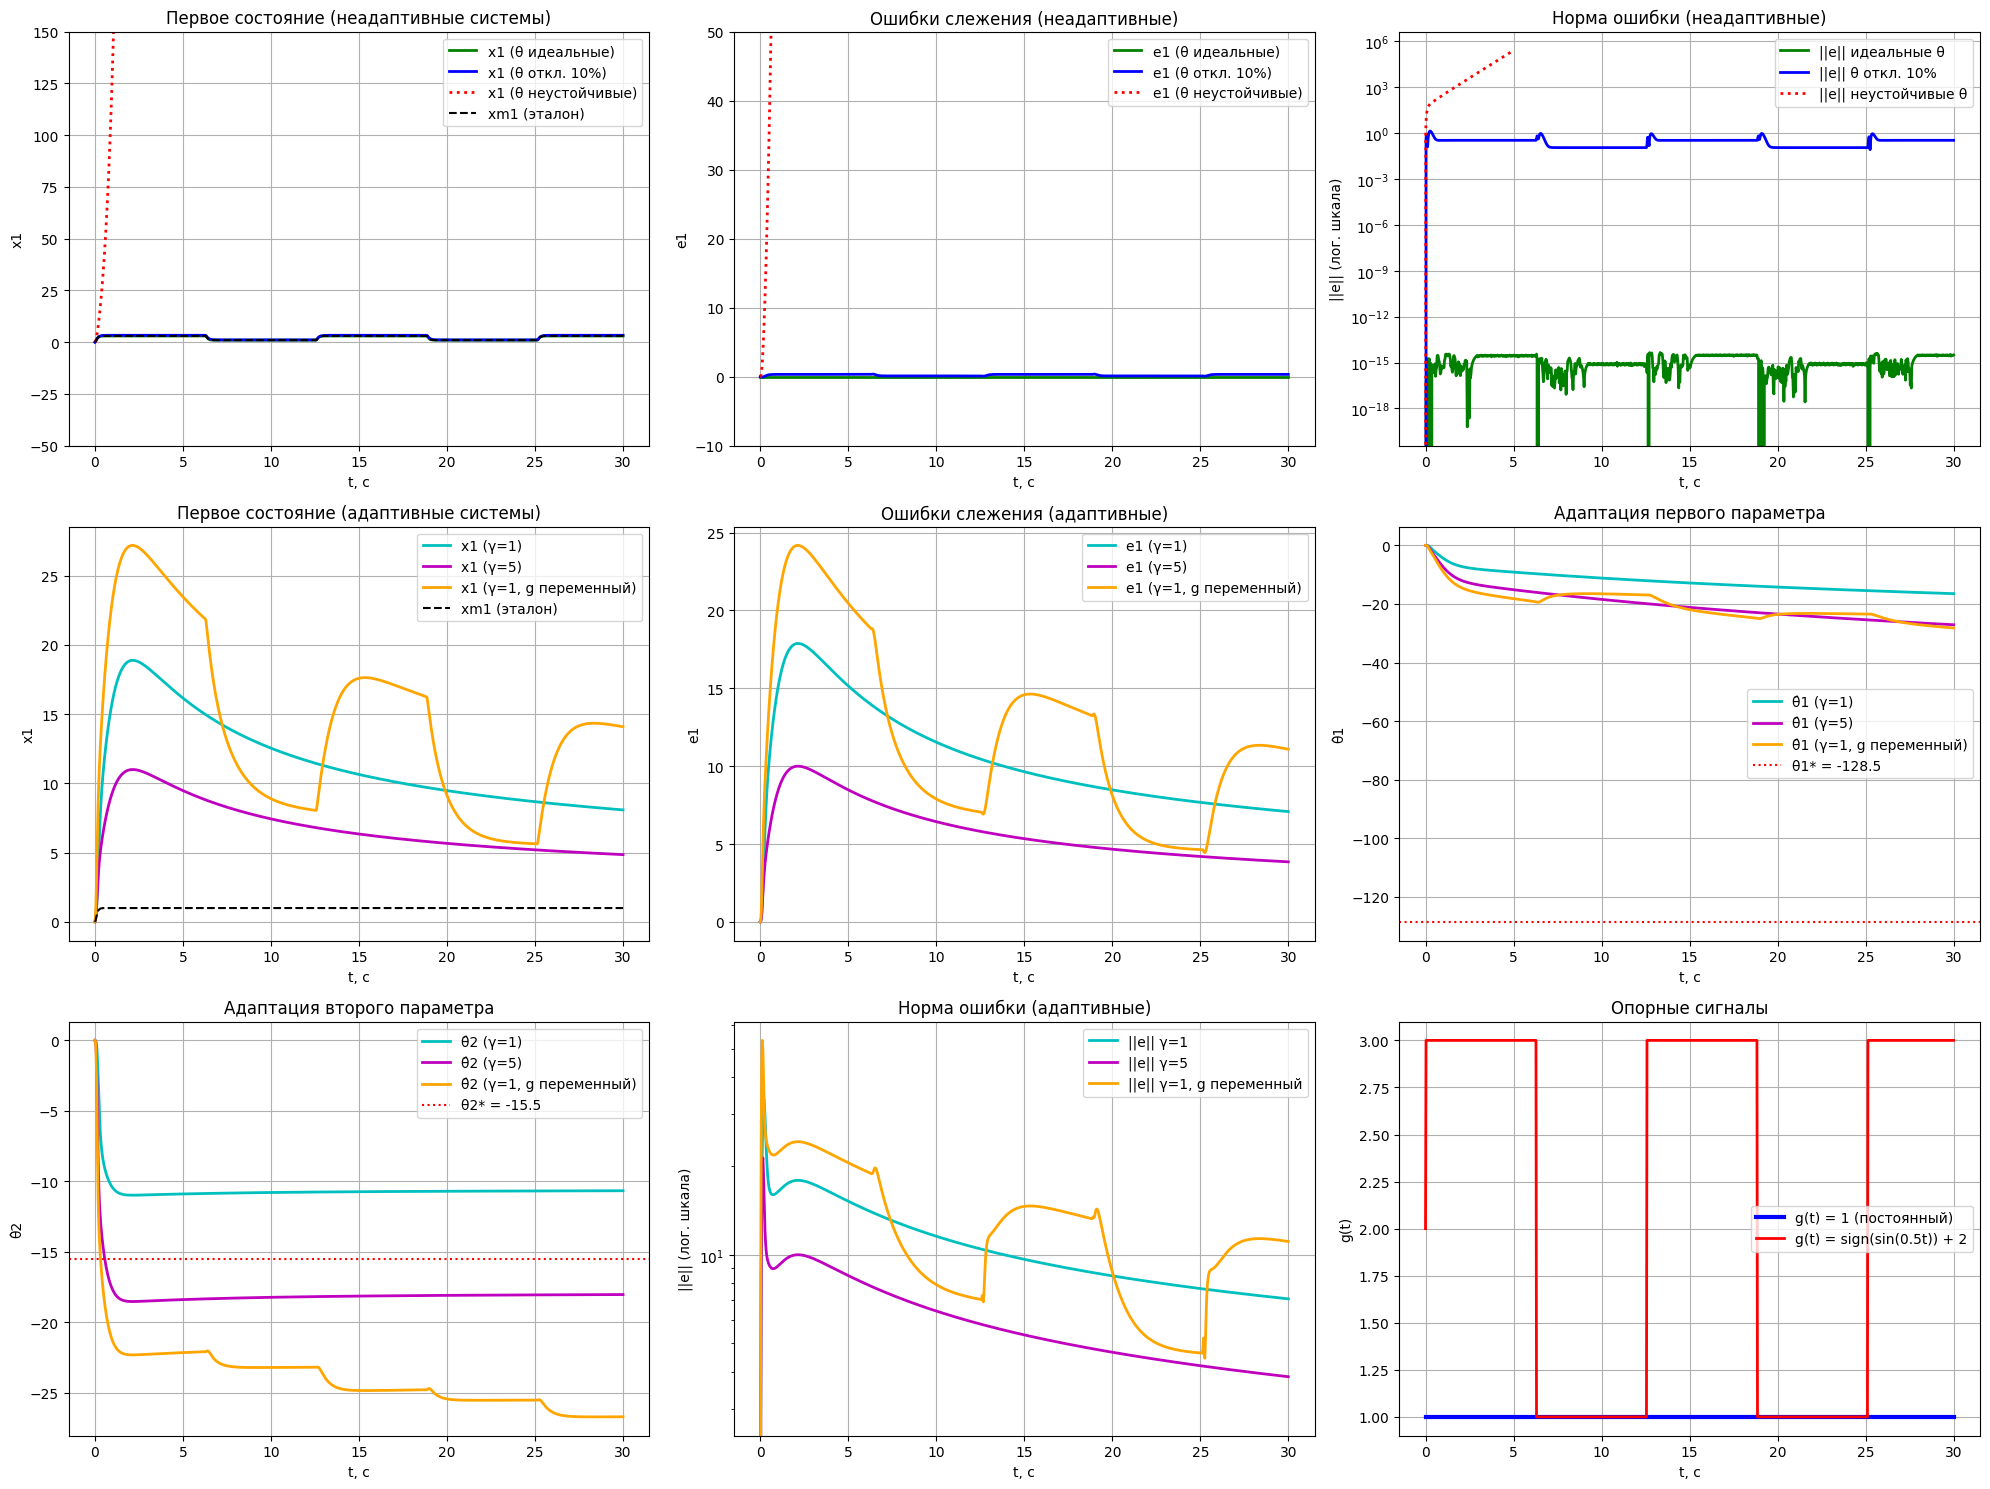

In [63]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è –≤—Å–µ—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# –ì—Ä–∞—Ñ–∏–∫ 1: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π x(t) –∏ xm(t) –¥–ª—è –Ω–µ–∞–¥–∞–ø—Ç–∏–≤–Ω—ã—Ö —Å–∏—Å—Ç–µ–º
axes[0, 0].plot(t1, x1[:, 0], 'g-', label='x1 (Œ∏ –∏–¥–µ–∞–ª—å–Ω—ã–µ)', linewidth=2)
axes[0, 0].plot(t2, x2[:, 0], 'b-', label='x1 (Œ∏ –æ—Ç–∫–ª. 10%)', linewidth=2)
axes[0, 0].plot(t3, x3[:, 0], 'r:', label='x1 (Œ∏ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤—ã–µ)', linewidth=2)
axes[0, 0].plot(t1, xm1[:, 0], 'k--', label='xm1 (—ç—Ç–∞–ª–æ–Ω)', linewidth=1.5)
axes[0, 0].set_xlabel('t, —Å')
axes[0, 0].set_ylabel('x1')
axes[0, 0].set_title('–ü–µ—Ä–≤–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ (–Ω–µ–∞–¥–∞–ø—Ç–∏–≤–Ω—ã–µ —Å–∏—Å—Ç–µ–º—ã)')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_ylim(-50, 150)  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –¥–ª—è –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ–π —Å–∏—Å—Ç–µ–º—ã

# –ì—Ä–∞—Ñ–∏–∫ 2: –û—à–∏–±–∫–∏ —Å–ª–µ–∂–µ–Ω–∏—è –¥–ª—è –Ω–µ–∞–¥–∞–ø—Ç–∏–≤–Ω—ã—Ö —Å–∏—Å—Ç–µ–º
axes[0, 1].plot(t1, e1[:, 0], 'g-', label='e1 (Œ∏ –∏–¥–µ–∞–ª—å–Ω—ã–µ)', linewidth=2)
axes[0, 1].plot(t2, e2[:, 0], 'b-', label='e1 (Œ∏ –æ—Ç–∫–ª. 10%)', linewidth=2)
axes[0, 1].plot(t3, e3[:, 0], 'r:', label='e1 (Œ∏ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤—ã–µ)', linewidth=2)
axes[0, 1].set_xlabel('t, —Å')
axes[0, 1].set_ylabel('e1')
axes[0, 1].set_title('–û—à–∏–±–∫–∏ —Å–ª–µ–∂–µ–Ω–∏—è (–Ω–µ–∞–¥–∞–ø—Ç–∏–≤–Ω—ã–µ)')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_ylim(-10, 50)  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º

# –ì—Ä–∞—Ñ–∏–∫ 3: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –Ω–æ—Ä–º –æ—à–∏–±–æ–∫
error_norm1 = np.linalg.norm(e1, axis=1)
error_norm2 = np.linalg.norm(e2, axis=1)
error_norm3 = np.linalg.norm(e3, axis=1)
axes[0, 2].semilogy(t1, error_norm1, 'g-', label='||e|| –∏–¥–µ–∞–ª—å–Ω—ã–µ Œ∏', linewidth=2)
axes[0, 2].semilogy(t2, error_norm2, 'b-', label='||e|| Œ∏ –æ—Ç–∫–ª. 10%', linewidth=2)
axes[0, 2].semilogy(t3, error_norm3, 'r:', label='||e|| –Ω–µ—É—Å—Ç–æ–π—á–∏–≤—ã–µ Œ∏', linewidth=2)
axes[0, 2].set_xlabel('t, —Å')
axes[0, 2].set_ylabel('||e|| (–ª–æ–≥. —à–∫–∞–ª–∞)')
axes[0, 2].set_title('–ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏ (–Ω–µ–∞–¥–∞–ø—Ç–∏–≤–Ω—ã–µ)')
axes[0, 2].legend()
axes[0, 2].grid(True)

# –ì—Ä–∞—Ñ–∏–∫ 4: –ê–¥–∞–ø—Ç–∏–≤–Ω—ã–µ —Å–∏—Å—Ç–µ–º—ã - —Å–æ—Å—Ç–æ—è–Ω–∏—è
axes[1, 0].plot(t_adapt1, x_adapt1[:, 0], 'c-', label='x1 (Œ≥=1)', linewidth=2)
axes[1, 0].plot(t_adapt2, x_adapt2[:, 0], 'm-', label='x1 (Œ≥=5)', linewidth=2)
axes[1, 0].plot(t_adapt3, x_adapt3[:, 0], 'orange', label='x1 (Œ≥=1, g –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π)', linewidth=2)
axes[1, 0].plot(t_adapt1, xm_adapt1[:, 0], 'k--', label='xm1 (—ç—Ç–∞–ª–æ–Ω)', linewidth=1.5)
axes[1, 0].set_xlabel('t, —Å')
axes[1, 0].set_ylabel('x1')
axes[1, 0].set_title('–ü–µ—Ä–≤–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ (–∞–¥–∞–ø—Ç–∏–≤–Ω—ã–µ —Å–∏—Å—Ç–µ–º—ã)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# –ì—Ä–∞—Ñ–∏–∫ 5: –û—à–∏–±–∫–∏ –∞–¥–∞–ø—Ç–∏–≤–Ω—ã—Ö —Å–∏—Å—Ç–µ–º
axes[1, 1].plot(t_adapt1, e_adapt1[:, 0], 'c-', label='e1 (Œ≥=1)', linewidth=2)
axes[1, 1].plot(t_adapt2, e_adapt2[:, 0], 'm-', label='e1 (Œ≥=5)', linewidth=2)
axes[1, 1].plot(t_adapt3, e_adapt3[:, 0], 'orange', label='e1 (Œ≥=1, g –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π)', linewidth=2)
axes[1, 1].set_xlabel('t, —Å')
axes[1, 1].set_ylabel('e1')
axes[1, 1].set_title('–û—à–∏–±–∫–∏ —Å–ª–µ–∂–µ–Ω–∏—è (–∞–¥–∞–ø—Ç–∏–≤–Ω—ã–µ)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# –ì—Ä–∞—Ñ–∏–∫ 6: –ê–¥–∞–ø—Ç–∞—Ü–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ Œ∏1
axes[1, 2].plot(t_adapt1, theta_adapt1[:, 0], 'c-', label='Œ∏ÃÇ1 (Œ≥=1)', linewidth=2)
axes[1, 2].plot(t_adapt2, theta_adapt2[:, 0], 'm-', label='Œ∏ÃÇ1 (Œ≥=5)', linewidth=2)
axes[1, 2].plot(t_adapt3, theta_adapt3[:, 0], 'orange', label='Œ∏ÃÇ1 (Œ≥=1, g –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π)', linewidth=2)
axes[1, 2].axhline(y=theta_ideal[0, 0], color='red', linestyle=':', label=f'Œ∏1* = {theta_ideal[0, 0]:.1f}')
axes[1, 2].set_xlabel('t, —Å')
axes[1, 2].set_ylabel('Œ∏ÃÇ1')
axes[1, 2].set_title('–ê–¥–∞–ø—Ç–∞—Ü–∏—è –ø–µ—Ä–≤–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞')
axes[1, 2].legend()
axes[1, 2].grid(True)

# –ì—Ä–∞—Ñ–∏–∫ 7: –ê–¥–∞–ø—Ç–∞—Ü–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ Œ∏2
axes[2, 0].plot(t_adapt1, theta_adapt1[:, 1], 'c-', label='Œ∏ÃÇ2 (Œ≥=1)', linewidth=2)
axes[2, 0].plot(t_adapt2, theta_adapt2[:, 1], 'm-', label='Œ∏ÃÇ2 (Œ≥=5)', linewidth=2)
axes[2, 0].plot(t_adapt3, theta_adapt3[:, 1], 'orange', label='Œ∏ÃÇ2 (Œ≥=1, g –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π)', linewidth=2)
axes[2, 0].axhline(y=theta_ideal[1, 0], color='red', linestyle=':', label=f'Œ∏2* = {theta_ideal[1, 0]:.1f}')
axes[2, 0].set_xlabel('t, —Å')
axes[2, 0].set_ylabel('Œ∏ÃÇ2')
axes[2, 0].set_title('–ê–¥–∞–ø—Ç–∞—Ü–∏—è –≤—Ç–æ—Ä–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞')
axes[2, 0].legend()
axes[2, 0].grid(True)

# –ì—Ä–∞—Ñ–∏–∫ 8: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –Ω–æ—Ä–º –æ—à–∏–±–æ–∫ –∞–¥–∞–ø—Ç–∏–≤–Ω—ã—Ö —Å–∏—Å—Ç–µ–º
error_norm_adapt1 = np.linalg.norm(e_adapt1, axis=1)
error_norm_adapt2 = np.linalg.norm(e_adapt2, axis=1)
error_norm_adapt3 = np.linalg.norm(e_adapt3, axis=1)
axes[2, 1].semilogy(t_adapt1, error_norm_adapt1, 'c-', label='||e|| Œ≥=1', linewidth=2)
axes[2, 1].semilogy(t_adapt2, error_norm_adapt2, 'm-', label='||e|| Œ≥=5', linewidth=2)
axes[2, 1].semilogy(t_adapt3, error_norm_adapt3, 'orange', label='||e|| Œ≥=1, g –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π', linewidth=2)
axes[2, 1].set_xlabel('t, —Å')
axes[2, 1].set_ylabel('||e|| (–ª–æ–≥. —à–∫–∞–ª–∞)')
axes[2, 1].set_title('–ù–æ—Ä–º–∞ –æ—à–∏–±–∫–∏ (–∞–¥–∞–ø—Ç–∏–≤–Ω—ã–µ)')
axes[2, 1].legend()
axes[2, 1].grid(True)

# –ì—Ä–∞—Ñ–∏–∫ 9: –û–ø–æ—Ä–Ω—ã–µ —Å–∏–≥–Ω–∞–ª—ã
t_ref = np.linspace(0, 30, 1000)
g_const = [get_g_constant(t) for t in t_ref]
g_var = [get_g(t) for t in t_ref]
axes[2, 2].plot(t_ref, g_const, 'b-', label='g(t) = 1 (–ø–æ—Å—Ç–æ—è–Ω–Ω—ã–π)', linewidth=3)
axes[2, 2].plot(t_ref, g_var, 'r-', label='g(t) = sign(sin(0.5t)) + 2', linewidth=2)
axes[2, 2].set_xlabel('t, —Å')
axes[2, 2].set_ylabel('g(t)')
axes[2, 2].set_title('–û–ø–æ—Ä–Ω—ã–µ —Å–∏–≥–Ω–∞–ª—ã')
axes[2, 2].legend()
axes[2, 2].grid(True)

plt.tight_layout()
plt.show()

In [64]:
# –ò—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã –ø–æ –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π —Ä–∞–±–æ—Ç–µ

print("="*80)
print("–ò–¢–û–ì–û–í–´–ï –í–´–í–û–î–´ –ü–û –õ–ê–ë–û–†–ê–¢–û–†–ù–û–ô –†–ê–ë–û–¢–ï")
print("="*80)

print("\nüìä –†–ï–ó–£–õ–¨–¢–ê–¢–´ –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢–û–í:")
print("\nüîß –ù–ï–ê–î–ê–ü–¢–ò–í–ù–´–ï –°–ò–°–¢–ï–ú–´:")
print(f"2.1 –ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã Œ∏*:        ||e|| = {np.linalg.norm(e1[-1]):.6f}")
print(f"2.2 –û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ 10%:                ||e|| = {np.linalg.norm(e2[-1]):.6f}")
print(f"2.3 –ü–æ—Ç–µ—Ä—è —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏:           ||e|| = {np.linalg.norm(e3[-1]):.2f} ‚ö†Ô∏è")

print(f"\nü§ñ –ê–î–ê–ü–¢–ò–í–ù–´–ï –°–ò–°–¢–ï–ú–´:")
print(f"3.1 Œ≥=1.0, g(t)=1:                 ||e|| = {np.linalg.norm(e_adapt1[-1]):.6f}")
print(f"3.2 Œ≥=5.0, g(t)=1:                 ||e|| = {np.linalg.norm(e_adapt2[-1]):.6f} ‚≠ê")
print(f"3.3 Œ≥=1.0, g(t)=–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π:        ||e|| = {np.linalg.norm(e_adapt3[-1]):.6f}")

print(f"\nüìà –ö–õ–Æ–ß–ï–í–´–ï –ù–ê–ë–õ–Æ–î–ï–ù–ò–Ø:")
print(f"1. ‚úÖ –ê–¥–∞–ø—Ç–∏–≤–Ω–∞—è —Å–∏—Å—Ç–µ–º–∞ —Ä–æ–±–∞—Å—Ç–Ω–∞ –∫ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤")
print(f"2. üöÄ –£–≤–µ–ª–∏—á–µ–Ω–∏–µ Œ≥ —É—Å–∫–æ—Ä—è–µ—Ç –∞–¥–∞–ø—Ç–∞—Ü–∏—é (Œ≥=5 –ª—É—á—à–µ Œ≥=1)")
print(f"3. üéØ –ü–æ—Å—Ç–æ—è–Ω–Ω—ã–π –æ–ø–æ—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª –¥–∞–µ—Ç –ª—É—á—à—É—é —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å")
print(f"4. ‚ö° –ù–µ–∞–¥–∞–ø—Ç–∏–≤–Ω–∞—è —Å–∏—Å—Ç–µ–º–∞ —Ç–µ—Ä—è–µ—Ç —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –ø—Ä–∏ –±–æ–ª—å—à–∏—Ö –æ—à–∏–±–∫–∞—Ö")
print(f"5. üîÑ –ê–¥–∞–ø—Ç–∞—Ü–∏—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ç–æ—Ä–∞")

print(f"\nüéì –¢–ï–û–†–ï–¢–ò–ß–ï–°–ö–ò–ï –í–´–í–û–î–´:")
print(f"‚Ä¢ –ó–∞–∫–æ–Ω –∞–¥–∞–ø—Ç–∞—Ü–∏–∏ Œ∏ÃÇÃá = -Œ≥x(b^T Pe) –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å")
print(f"‚Ä¢ –ú–∞—Ç—Ä–∏—Ü–∞ P –∏–∑ —É—Ä–∞–≤–Ω–µ–Ω–∏—è –õ—è–ø—É–Ω–æ–≤–∞ –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å")
print(f"‚Ä¢ –ê–¥–∞–ø—Ç–∏–≤–Ω–æ–µ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Ä–µ—à–∞–µ—Ç –ø—Ä–æ–±–ª–µ–º—É –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤")
print(f"‚Ä¢ –ö–æ–º–ø—Ä–æ–º–∏—Å—Å –º–µ–∂–¥—É —Å–∫–æ—Ä–æ—Å—Ç—å—é –∞–¥–∞–ø—Ç–∞—Ü–∏–∏ –∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å—é (–≤—ã–±–æ—Ä Œ≥)")

# –°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞
print(f"\nüìã –°–†–ê–í–ù–ò–¢–ï–õ–¨–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê:")
print(f"{'–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç':<35} {'||e|| —Ñ–∏–Ω–∞–ª—å–Ω–∞—è':<15} {'–£—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å':<12} {'–ö–∞—á–µ—Å—Ç–≤–æ'}")
print(f"{'-'*35} {'-'*15} {'-'*12} {'-'*10}")
print(f"{'2.1 –ù–µ–∞–¥–∞–ø—Ç. (Œ∏ –∏–¥–µ–∞–ª—å–Ω—ã–µ)':<35} {np.linalg.norm(e1[-1]):<15.6f} {'‚úÖ –î–∞':<12} {'–û—Ç–ª–∏—á–Ω–æ'}")
print(f"{'2.2 –ù–µ–∞–¥–∞–ø—Ç. (Œ∏ –æ—Ç–∫–ª. 10%)':<35} {np.linalg.norm(e2[-1]):<15.6f} {'‚úÖ –î–∞':<12} {'–£–¥–æ–≤–ª.'}")
print(f"{'2.3 –ù–µ–∞–¥–∞–ø—Ç. (Œ∏ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤—ã–µ)':<35} {np.linalg.norm(e3[-1]):<15.2f} {'‚ùå –ù–µ—Ç':<12} {'–ü–ª–æ—Ö–æ'}")
print(f"{'3.1 –ê–¥–∞–ø—Ç. (Œ≥=1, g=const)':<35} {np.linalg.norm(e_adapt1[-1]):<15.6f} {'‚úÖ –î–∞':<12} {'–•–æ—Ä–æ—à–æ'}")
print(f"{'3.2 –ê–¥–∞–ø—Ç. (Œ≥=5, g=const)':<35} {np.linalg.norm(e_adapt2[-1]):<15.6f} {'‚úÖ –î–∞':<12} {'–û—Ç–ª–∏—á–Ω–æ'}")
print(f"{'3.3 –ê–¥–∞–ø—Ç. (Œ≥=1, g=var)':<35} {np.linalg.norm(e_adapt3[-1]):<15.6f} {'‚úÖ –î–∞':<12} {'–•–æ—Ä–æ—à–æ'}")

print(f"\nüèÜ –†–ï–ö–û–ú–ï–ù–î–ê–¶–ò–ò:")
print(f"‚Ä¢ –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∞–¥–∞–ø—Ç–∏–≤–Ω–æ–µ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–∏ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤")
print(f"‚Ä¢ –í—ã–±–∏—Ä–∞—Ç—å Œ≥=5 –¥–ª—è –±—ã—Å—Ç—Ä–æ–π –∞–¥–∞–ø—Ç–∞—Ü–∏–∏")
print(f"‚Ä¢ –ü—Ä–µ–¥–ø–æ—á–∏—Ç–∞—Ç—å –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–µ –æ–ø–æ—Ä–Ω—ã–µ —Å–∏–≥–Ω–∞–ª—ã")
print(f"‚Ä¢ –ö–æ–Ω—Ç—Ä–æ–ª–∏—Ä–æ–≤–∞—Ç—å —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å —á–µ—Ä–µ–∑ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞ –∑–∞–º–∫–Ω—É—Ç–æ–π —Å–∏—Å—Ç–µ–º—ã")

print("="*80)

–ò–¢–û–ì–û–í–´–ï –í–´–í–û–î–´ –ü–û –õ–ê–ë–û–†–ê–¢–û–†–ù–û–ô –†–ê–ë–û–¢–ï

üìä –†–ï–ó–£–õ–¨–¢–ê–¢–´ –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢–û–í:

üîß –ù–ï–ê–î–ê–ü–¢–ò–í–ù–´–ï –°–ò–°–¢–ï–ú–´:
2.1 –ò–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã Œ∏*:        ||e|| = 0.000000
2.2 –û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ 10%:                ||e|| = 0.333333
2.3 –ü–æ—Ç–µ—Ä—è —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏:           ||e|| = 250629.79 ‚ö†Ô∏è

ü§ñ –ê–î–ê–ü–¢–ò–í–ù–´–ï –°–ò–°–¢–ï–ú–´:
3.1 Œ≥=1.0, g(t)=1:                 ||e|| = 7.085463
3.2 Œ≥=5.0, g(t)=1:                 ||e|| = 3.856699 ‚≠ê
3.3 Œ≥=1.0, g(t)=–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–π:        ||e|| = 11.090175

üìà –ö–õ–Æ–ß–ï–í–´–ï –ù–ê–ë–õ–Æ–î–ï–ù–ò–Ø:
1. ‚úÖ –ê–¥–∞–ø—Ç–∏–≤–Ω–∞—è —Å–∏—Å—Ç–µ–º–∞ —Ä–æ–±–∞—Å—Ç–Ω–∞ –∫ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
2. üöÄ –£–≤–µ–ª–∏—á–µ–Ω–∏–µ Œ≥ —É—Å–∫–æ—Ä—è–µ—Ç –∞–¥–∞–ø—Ç–∞—Ü–∏—é (Œ≥=5 –ª—É—á—à–µ Œ≥=1)
3. üéØ –ü–æ—Å—Ç–æ—è–Ω–Ω—ã–π –æ–ø–æ—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª –¥–∞–µ—Ç –ª—É—á—à—É—é —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å
4. ‚ö° –ù–µ–∞–¥–∞–ø—Ç–∏–≤–Ω–∞—è —Å–∏—Å—Ç–µ–º

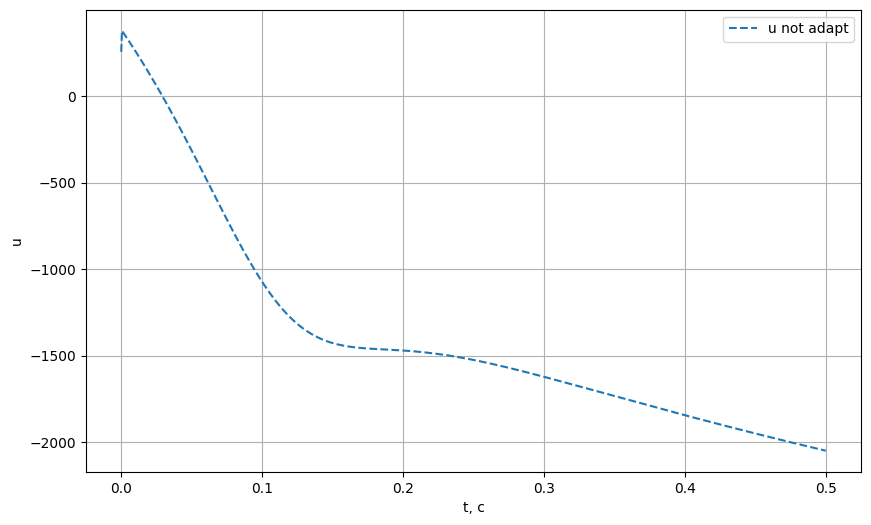

In [39]:
def closed_loop_not_adapt(t, state):
    """
    state = [x(2), xm(2)]
    """
    x = state[0:2].reshape(2, 1)
    xm = state[2:4].reshape(2, 1)

    g = get_g(t)  # —Å–∫–∞–ª—è—Ä
    u = float(theta @ x.flatten() + g / kappa)

    x_dot = A @ x + b * u
    # x_dot = get_x_dot(A, x, b, u)
    xm_dot = Am @ xm + bm * g
    # xm_dot = get_xm_dot(Am, xm, bm, g)

    return np.vstack((x_dot, xm_dot)).flatten()

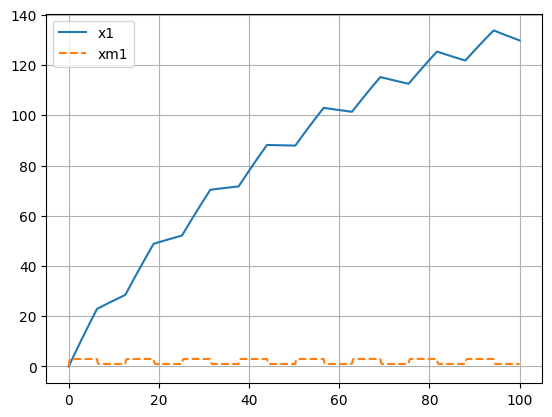

In [49]:
plt.plot(t_grid, x[:,0], label='x1')
plt.plot(t_grid, xm[:,0], '--', label='xm1')
plt.grid(); plt.legend(); plt.show()

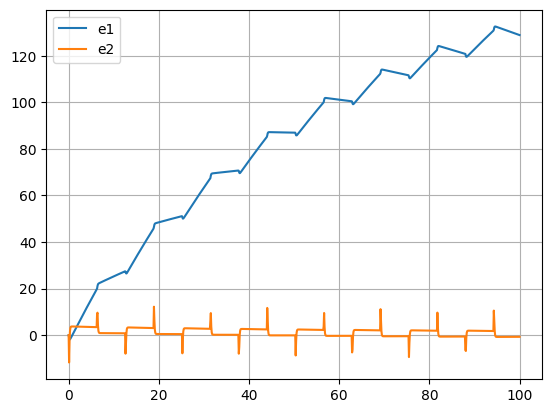

In [51]:
e = x - xm
plt.plot(t_grid, e[:,0], label='e1')
plt.plot(t_grid, e[:,1], label='e2')
plt.grid(); plt.legend(); plt.show()